In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
master = pd.read_csv('masterFinal.csv')
master = master.dropna()
master

,SUBJECT_ID,AGE,benzodiazepine,opioid,anticholinergic,steroid,deep sedation,metabolic disorder,hypotension,septicemia,sleep,anemia,alcohol/drug abuse,rbc,wbc,bicarbonate,albumin,chloride,pco2,delirium
0,11,50,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1,1
1,12,72,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,1
2,17,47,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,1,0
3,21,87,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1,1,1,1,1,1
4,23,71,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,1
5,25,59,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,0
6,31,72,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1,1,1,1
7,36,70,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,1
8,37,69,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1,0,1,1,1
9,38,76,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,1,1,1,1,0


In [3]:
###divide master randomly into train and test
master1 = master.copy()
testChoose = np.random.rand(len(master)) < 0.125
test = master[testChoose]
# ct = master[~choose]
# choose2 = np.random.rand(len(ct)) < 0.5
# cross_val = ct[choose2]
ones = len(test[test['delirium'] == 1])
zeros = len(test[test['delirium'] == 0])
print('percent 1s: ' + str(ones/len(test)))
print('percent 0s: ' + str(zeros/len(test)))
len(test)

percent 1s: 0.4989339019189765
percent 0s: 0.5010660980810234


1876

In [4]:
master1 = master[~testChoose]
choose = np.random.rand(len(master1)) < 0.9
train = master1[choose]
variables = train.drop(columns=['SUBJECT_ID', 'delirium'])
output = train['delirium']
ones = len(train[train['delirium'] == 1])
zeros = len(train[train['delirium'] == 0])
print('percent 1s: ' + str(ones/len(train)))
print('percent 0s: ' + str(zeros/len(train)))
len(train)

percent 1s: 0.4805121597680786
percent 0s: 0.5194878402319214


12418

In [5]:
# varOriginal = variables.copy()
# variables = variables.drop(columns = ['AGE'])
# testOriginal = test.copy()
# test = test.drop(columns=['AGE'])

In [10]:
###Basic Scikit Learn Logistic Regression

sk_test = test.copy()

##train model
sk_model = LogisticRegression().fit(variables, output)

##print coefficients
sk_coeff = variables.T
sk_coeff['coefficients'] = sk_model.coef_.T
sk_coeff = pd.DataFrame(sk_coeff['coefficients'])
print('-----COEFFICIENTS-----')
print(sk_coeff)
print('')

##apply model to test data and print predictions
sk_test_var = sk_test.drop(columns=['SUBJECT_ID', 'delirium'])
predicted = sk_model.predict(sk_test_var)
sk_test['predicted delirium'] = predicted
prob = sk_model.predict_proba(sk_test_var)
prob = pd.DataFrame(prob)
sk_test = sk_test.reset_index()
sk_test = pd.concat([sk_test, prob], axis = 1)

##evaluate model
#print confusion matrix
def print_matrix(matrix):
    df = pd.DataFrame(index=['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
    df['predicted 0'][0] = matrix[0,0]
    df['predicted 0'][1] = matrix[1,0]
    df['predicted 1'][0] = matrix[0,1]
    df['predicted 1'][1] = matrix[1,1]
    return df

cnf_matrix = confusion_matrix(sk_test['delirium'], sk_test['predicted delirium'], labels=[0,1])
print('-----CONFUSION MATRIX-----')
print(print_matrix(cnf_matrix))
print('')

#print other evaluation measures
print('-----EVALUATE-----')
precision = precision_score(sk_test['delirium'], sk_test['predicted delirium'])
recall = recall_score(sk_test['delirium'], sk_test['predicted delirium'])
f_value = f1_score(sk_test['delirium'], sk_test['predicted delirium'])
accuracy = ((int(cnf_matrix[1,1]) + int(cnf_matrix[0,0]))/sum(sum(cnf_matrix)))*100
pos_accuracy = (int(cnf_matrix[1,1])/(int(cnf_matrix[1,1]) + int(cnf_matrix[0,1])))*100
neg_accuracy = (int(cnf_matrix[0,0])/(int(cnf_matrix[0,0]) + int(cnf_matrix[1,0])))*100
# print('precision: ' + str(precision))
# print('recall: ' + str(recall))
# print('f-measure: ' + str(f_value))
print('percent accuracy: ' + str(accuracy))
print('acc of positives: ' + str(pos_accuracy))
print('acc of negatives: ' + str(neg_accuracy))

sk_test

-----COEFFICIENTS-----
                    coefficients
AGE                     0.014248
benzodiazepine          0.605732
opioid                 -0.202399
anticholinergic        -0.088612
steroid                 0.410997
deep sedation          -0.004245
metabolic disorder      0.076096
hypotension             0.050920
septicemia              0.210278
sleep                   0.107658
anemia                  0.117035
alcohol/drug abuse      0.632206
rbc                     0.589455
wbc                     0.248222
bicarbonate             0.186579
albumin                 0.485021
chloride                0.255222
pco2                    0.083281

-----CONFUSION MATRIX-----
         predicted 0 predicted 1
actual 0         715         350
actual 1         317         607

-----EVALUATE-----
percent accuracy: 66.46556058320763
acc of positives: 63.42737722048067
acc of negatives: 69.28294573643412


,index,SUBJECT_ID,AGE,benzodiazepine,opioid,anticholinergic,steroid,deep sedation,metabolic disorder,hypotension,...,rbc,wbc,bicarbonate,albumin,chloride,pco2,delirium,predicted delirium,0,1
0,0,11,50,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0,0,0,0,1,1,0,0.700209,0.299791
1,1,12,72,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1,1,1,1,1,1,1,0.303498,0.696502
2,16,59,87,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0,1,0,0,0,1,0,0.564259,0.435741
3,18,63,89,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1,0,0,1,0,0,0,0.521313,0.478687
4,41,150,38,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0.733460,0.266540
5,43,164,82,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1,1,1,1,1,1,1,0.199661,0.800339
6,56,197,46,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0,0,1,1,0,0,0,0.748064,0.251936
7,83,272,67,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,0,0.707931,0.292069
8,88,287,71,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0,0,1,1,0,1,0,0.554472,0.445528
9,95,307,74,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0,1,1,1,1,1,1,0.474558,0.525442


In [12]:
##Sample Data to Test the Logistic Regression Method

sample_train = pd.DataFrame(np.array([[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1], [1, 1, 1, 0, 1, 1], [1, 1, 0, 1, 1, 1], [1, 0, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0]]), columns = ['benzodiazepine', 'opioid', 'anticholinergic', 'steroid', 'deep sedation', 'delirium'])

sample_test = pd.DataFrame(np.array([[1, 1, 1, 1, 1], [1, 0, 0, 0, 0], [1, 1, 1, 0, 1], [1, 1, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 1, 0, 1]]), columns = ['benzodiazepine', 'opioid', 'anticholinergic', 'steroid', 'deep sedation'])

sample_variables = sample_train.drop(columns=['delirium'])
sample_output = sample_train['delirium']
sample_model = LogisticRegression().fit(sample_variables, sample_output)

sample_predicted = sample_model.predict(sample_test)
prob = sample_model.predict_proba(sample_test)
prob = pd.DataFrame(prob)
sample_test = sample_test.reset_index()
sample_test['predicted delirium'] = sample_predicted
sample_test = pd.concat([sample_test, prob], axis = 1)
print(sample_train)
sample_test

In [13]:
##Logistic Regression with Statsmodels
import statsmodels.discrete.discrete_model as sm

#train model
sm_model = sm.Logit(output, variables)

#print coefficients
print('-----COEFFICIENTS-----')
print(sm_model.fit().params)
print('')

#test
sm_test = test.copy()
sm_test_var = sm_test.drop(columns=['SUBJECT_ID', 'delirium'])
sm_test['p(1)'] = sm_model.fit().predict(sm_test_var)

sm_test['predicted delirium'] = 1
for i in sm_test.index:
    if sm_test['p(1)'][i] < 0.5:
        sm_test['predicted delirium'][i] = 0 
        

##evaluate model
#print confusion matrix
def print_matrix(matrix):
    df = pd.DataFrame(index=['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
    df['predicted 0'][0] = matrix[0,0]
    df['predicted 0'][1] = matrix[1,0]
    df['predicted 1'][0] = matrix[0,1]
    df['predicted 1'][1] = matrix[1,1]
    return df

cnf_matrix = confusion_matrix(sm_test['delirium'], sm_test['predicted delirium'], labels=[0,1])
print('-----CONFUSION MATRIX-----')
print(print_matrix(cnf_matrix))
print('')

#print other evaluation measures
print('-----EVALUATE-----')
precision = precision_score(sm_test['delirium'], sm_test['predicted delirium'])
recall = recall_score(sm_test['delirium'], sm_test['predicted delirium'])
f_value = f1_score(sm_test['delirium'], sm_test['predicted delirium'])
accuracy = ((int(cnf_matrix[1,1]) + int(cnf_matrix[0,0]))/sum(sum(cnf_matrix)))*100
print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('f-measure: ' + str(f_value))
print('percent accuracy: ' + str(accuracy))

sm_test

-----COEFFICIENTS-----
Optimization terminated successfully.
         Current function value: 0.629276
         Iterations 5
AGE                  -0.006823
benzodiazepine        0.422880
opioid               -0.692981
anticholinergic      -0.266230
steroid               0.335160
deep sedation         0.012691
metabolic disorder    0.027439
hypotension           0.105333
septicemia            0.310154
sleep                 0.011142
anemia                0.101528
alcohol/drug abuse    0.214196
rbc                   0.542510
wbc                   0.309011
bicarbonate           0.059702
albumin               0.496027
chloride              0.047712
pco2                  0.102900
dtype: float64

Optimization terminated successfully.
         Current function value: 0.629276
         Iterations 5


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-----CONFUSION MATRIX-----
         predicted 0 predicted 1
actual 0         689         376
actual 1         328         596

-----EVALUATE-----
precision: 0.6131687242798354
recall: 0.645021645021645
f-measure: 0.6286919831223629
percent accuracy: 64.60532931121166


,SUBJECT_ID,AGE,benzodiazepine,opioid,anticholinergic,steroid,deep sedation,metabolic disorder,hypotension,septicemia,...,alcohol/drug abuse,rbc,wbc,bicarbonate,albumin,chloride,pco2,delirium,p(1),predicted delirium
0,11,50,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,0,1,1,0.420721,0
1,12,72,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1,1,1,1,1,1,0.632494,1
16,59,87,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0,1,0,0,0,1,0.487302,0
18,63,89,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1,0,0,1,0,0,0.509600,1
41,150,38,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,0,0,0,0.425656,0
43,164,82,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,1,1,1,1,1,0.689368,1
56,197,46,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0,0,1,1,0,0,0.395801,0
83,272,67,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,1,0,0,0,0.468579,0
88,287,71,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0,0,1,1,0,1,0.480383,0
95,307,74,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0,1,1,1,1,1,0.423728,0


In [36]:
###Scikit Learn Logistic Regression With Different Regularization Coefficients (C)

#from sklearn.linear_model.logistic import _logistic_loss
from sklearn.metrics import accuracy_score

reg_cross_val = cross_val.copy()
reg_cross_val_var = reg_cross_val.drop(columns = ['SUBJECT_ID', 'delirium'])

reg_test = test.copy()
reg_test_var = reg_test.drop(columns=['SUBJECT_ID', 'delirium'])

c_values = [0.001,0.01,0.1,1,10,100,1000]

reg_c_cost = pd.DataFrame(columns = ['regularization coefficient', 'accuracy'])

for i in c_values: 
    reg_model = LogisticRegression(C=i, fit_intercept= False).fit(variables, output)
    reg_cross_val['predicted delirium'] = reg_model.predict(reg_cross_val_var)
    accuracy = accuracy_score(reg_cross_val['delirium'], reg_cross_val['predicted delirium'])
    row = {'regularization coefficient': 1/i, 
           'accuracy': accuracy}
    reg_c_cost = reg_c_cost.append(row, ignore_index = True)


a = reg_c_cost['accuracy'].tolist().index(max(reg_c_cost['accuracy']))
optimumC = 1/(reg_c_cost['regularization coefficient'][a])
print(reg_c_cost)

reg_model = LogisticRegression(C=optimumC, fit_intercept= False).fit(variables, output)
reg_test['predicted delirium'] = reg_model.predict(reg_test_var)
prob = reg_model.predict_proba(reg_test_var)
prob = pd.DataFrame(prob)
reg_test = reg_test.reset_index()
reg_test = pd.concat([reg_test, prob], axis = 1)

#print confusion matrix
def print_matrix(matrix):
    df = pd.DataFrame(index=['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
    df['predicted 0'][0] = matrix[0,0]
    df['predicted 0'][1] = matrix[1,0]
    df['predicted 1'][0] = matrix[0,1]
    df['predicted 1'][1] = matrix[1,1]
    return df

cnf_matrix = confusion_matrix(reg_test['delirium'], reg_test['predicted delirium'], labels=[0,1])
print('-----CONFUSION MATRIX-----')
print(print_matrix(cnf_matrix))
print('')

#print other evaluation measures
print('-----EVALUATE-----')
precision = precision_score(reg_test['delirium'], reg_test['predicted delirium'])
recall = recall_score(reg_test['delirium'], reg_test['predicted delirium'])
f_value = f1_score(reg_test['delirium'], reg_test['predicted delirium'])
accuracy = ((int(cnf_matrix[1,1]) + int(cnf_matrix[0,0]))/sum(sum(cnf_matrix)))*100
print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('f-measure: ' + str(f_value))
print('percent accuracy: ' + str(accuracy))

reg_test

   regularization coefficient  accuracy
0                    1000.000  0.854491
1                     100.000  0.853892
2                      10.000  0.850299
3                       1.000  0.849102
4                       0.100  0.849102
5                       0.010  0.849102
6                       0.001  0.849102
-----CONFUSION MATRIX-----
         predicted 0 predicted 1
actual 0        1490           0
actual 1         228           0

-----EVALUATE-----
precision: 0.0
recall: 0.0
f-measure: 0.0
percent accuracy: 86.72875436554133


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,index,SUBJECT_ID,benzodiazepine,opioid,anticholinergic,steroid,deep sedation,metabolic disorder,hypotension,septicemia,sleep,anemia,alcohol/drug abuse,AGE,delirium,predicted delirium,0,1
0,21,218,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,79,0,0,0.896070,0.103930
1,23,222,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,64,1,0,0.836109,0.163891
2,31,269,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40,0,0,0.758076,0.241924
3,34,284,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,87,0,0,0.917486,0.082514
4,35,286,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,85,0,0,0.909292,0.090708
5,38,298,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,73,0,0,0.883076,0.116924
6,50,367,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,60,1,0,0.851212,0.148788
7,52,373,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34,0,0,0.737269,0.262731
8,54,378,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,71,1,0,0.876979,0.123021
9,56,395,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,74,1,0,0.866229,0.133771


In [14]:
###Support Vector Machine
from sklearn import svm

svm_test = test.copy()

svm_classifier = svm.SVC(kernel='linear').fit(variables, output)
svm_test_var = svm_test.drop(columns = ['SUBJECT_ID', 'delirium'])
svm_test['predicted delirium'] = svm_classifier.predict(svm_test_var)

#print confusion matrix
def print_matrix(matrix):
    df = pd.DataFrame(index=['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
    df['predicted 0'][0] = matrix[0,0]
    df['predicted 0'][1] = matrix[1,0]
    df['predicted 1'][0] = matrix[0,1]
    df['predicted 1'][1] = matrix[1,1]
    return df

cnf_matrix = confusion_matrix(svm_test['delirium'], svm_test['predicted delirium'], labels=[0,1])
print('-----CONFUSION MATRIX-----')
print(print_matrix(cnf_matrix))
print('')

#print other evaluation measures
precision = precision_score(svm_test['delirium'], svm_test['predicted delirium'])
recall = recall_score(svm_test['delirium'], svm_test['predicted delirium'])
f_value = f1_score(svm_test['delirium'], svm_test['predicted delirium'])
accuracy = ((int(cnf_matrix[1,1]) + int(cnf_matrix[0,0]))/sum(sum(cnf_matrix)))*100
pos_accuracy = (int(cnf_matrix[1,1])/(int(cnf_matrix[1,1]) + int(cnf_matrix[0,1])))*100
neg_accuracy = (int(cnf_matrix[0,0])/(int(cnf_matrix[0,0]) + int(cnf_matrix[1,0])))*100
# print('precision: ' + str(precision))
# print('recall: ' + str(recall))
# print('f-measure: ' + str(f_value))
print('percent accuracy: ' + str(accuracy))
print('acc of positives: ' + str(pos_accuracy))
print('acc of negatives: ' + str(neg_accuracy))

svm_test

-----CONFUSION MATRIX-----
         predicted 0 predicted 1
actual 0         644         421
actual 1         311         613

percent accuracy: 63.19758672699849
acc of positives: 59.284332688588
acc of negatives: 67.43455497382199


,SUBJECT_ID,AGE,benzodiazepine,opioid,anticholinergic,steroid,deep sedation,metabolic disorder,hypotension,septicemia,...,anemia,alcohol/drug abuse,rbc,wbc,bicarbonate,albumin,chloride,pco2,delirium,predicted delirium
0,11,50,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,1,1,1
1,12,72,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,1,1,1,1,1
16,59,87,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0,1,0,0,0,1,1
18,63,89,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,0,0,1,0,0,1
41,150,38,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0,0,0,0
43,164,82,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,1,1,1,1,1
56,197,46,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,1,0,0,0
83,272,67,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,0,1,0,0,0,0
88,287,71,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,1,1,0,1,1
95,307,74,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,1,1,1,1,0


In [5]:


#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc_test = test.copy()

rfc_model = RandomForestClassifier(bootstrap = True, max_features = 'auto').fit(variables, output)
rfc_test_var = rfc_test.drop(columns = ['SUBJECT_ID', 'delirium'])
rfc_test['predicted delirium'] = rfc_model.predict(rfc_test_var)

#print confusion matrix
def print_matrix(matrix):
    df = pd.DataFrame(index=['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
    df['predicted 0'][0] = matrix[0,0]
    df['predicted 0'][1] = matrix[1,0]
    df['predicted 1'][0] = matrix[0,1]
    df['predicted 1'][1] = matrix[1,1]
    return df

cnf_matrix = confusion_matrix(rfc_test['delirium'], rfc_test['predicted delirium'], labels=[0,1])
print('-----CONFUSION MATRIX-----')
print(print_matrix(cnf_matrix))
print('')

#print other evaluation measures
print('-----EVALUATE-----')
precision = precision_score(rfc_test['delirium'], rfc_test['predicted delirium'])
recall = recall_score(rfc_test['delirium'], rfc_test['predicted delirium'])
f_value = f1_score(rfc_test['delirium'], rfc_test['predicted delirium'])
accuracy = ((int(cnf_matrix[1,1]) + int(cnf_matrix[0,0]))/sum(sum(cnf_matrix)))*100
pos_accuracy = (int(cnf_matrix[1,1])/(int(cnf_matrix[1,1]) + int(cnf_matrix[0,1])))*100
neg_accuracy = (int(cnf_matrix[0,0])/(int(cnf_matrix[0,0]) + int(cnf_matrix[1,0])))*100
# print('precision: ' + str(precision))
# print('recall: ' + str(recall))
# print('f-measure: ' + str(f_value))
print('percent accuracy: ' + str(accuracy))
print('acc of positives: ' + str(pos_accuracy))
print('acc of negatives: ' + str(neg_accuracy))

rfc_test

-----CONFUSION MATRIX-----
         predicted 0 predicted 1
actual 0         616         324
actual 1         415         521

-----EVALUATE-----
percent accuracy: 60.60767590618337
acc of positives: 61.65680473372781
acc of negatives: 59.747817652764304


,SUBJECT_ID,AGE,benzodiazepine,opioid,anticholinergic,steroid,deep sedation,metabolic disorder,hypotension,septicemia,...,anemia,alcohol/drug abuse,rbc,wbc,bicarbonate,albumin,chloride,pco2,delirium,predicted delirium
6,31,72,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1,1,1,1,1,1
9,38,76,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0,1,1,1,1,0,1
15,55,64,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1,1,0,1,0,1,0
16,59,87,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0,1,0,0,0,1,0
19,64,27,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1,1,1,1,0,1,0
29,117,50,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1,1,1,1,1,1,1
32,134,81,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,1,1,0,0
40,147,25,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,1,1,0,1
50,178,48,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0,1,0,1,1,0,0
61,208,50,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,0,0,0,0,1,0


In [ ]:
estimator = rfc_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = list(variables.columns),
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

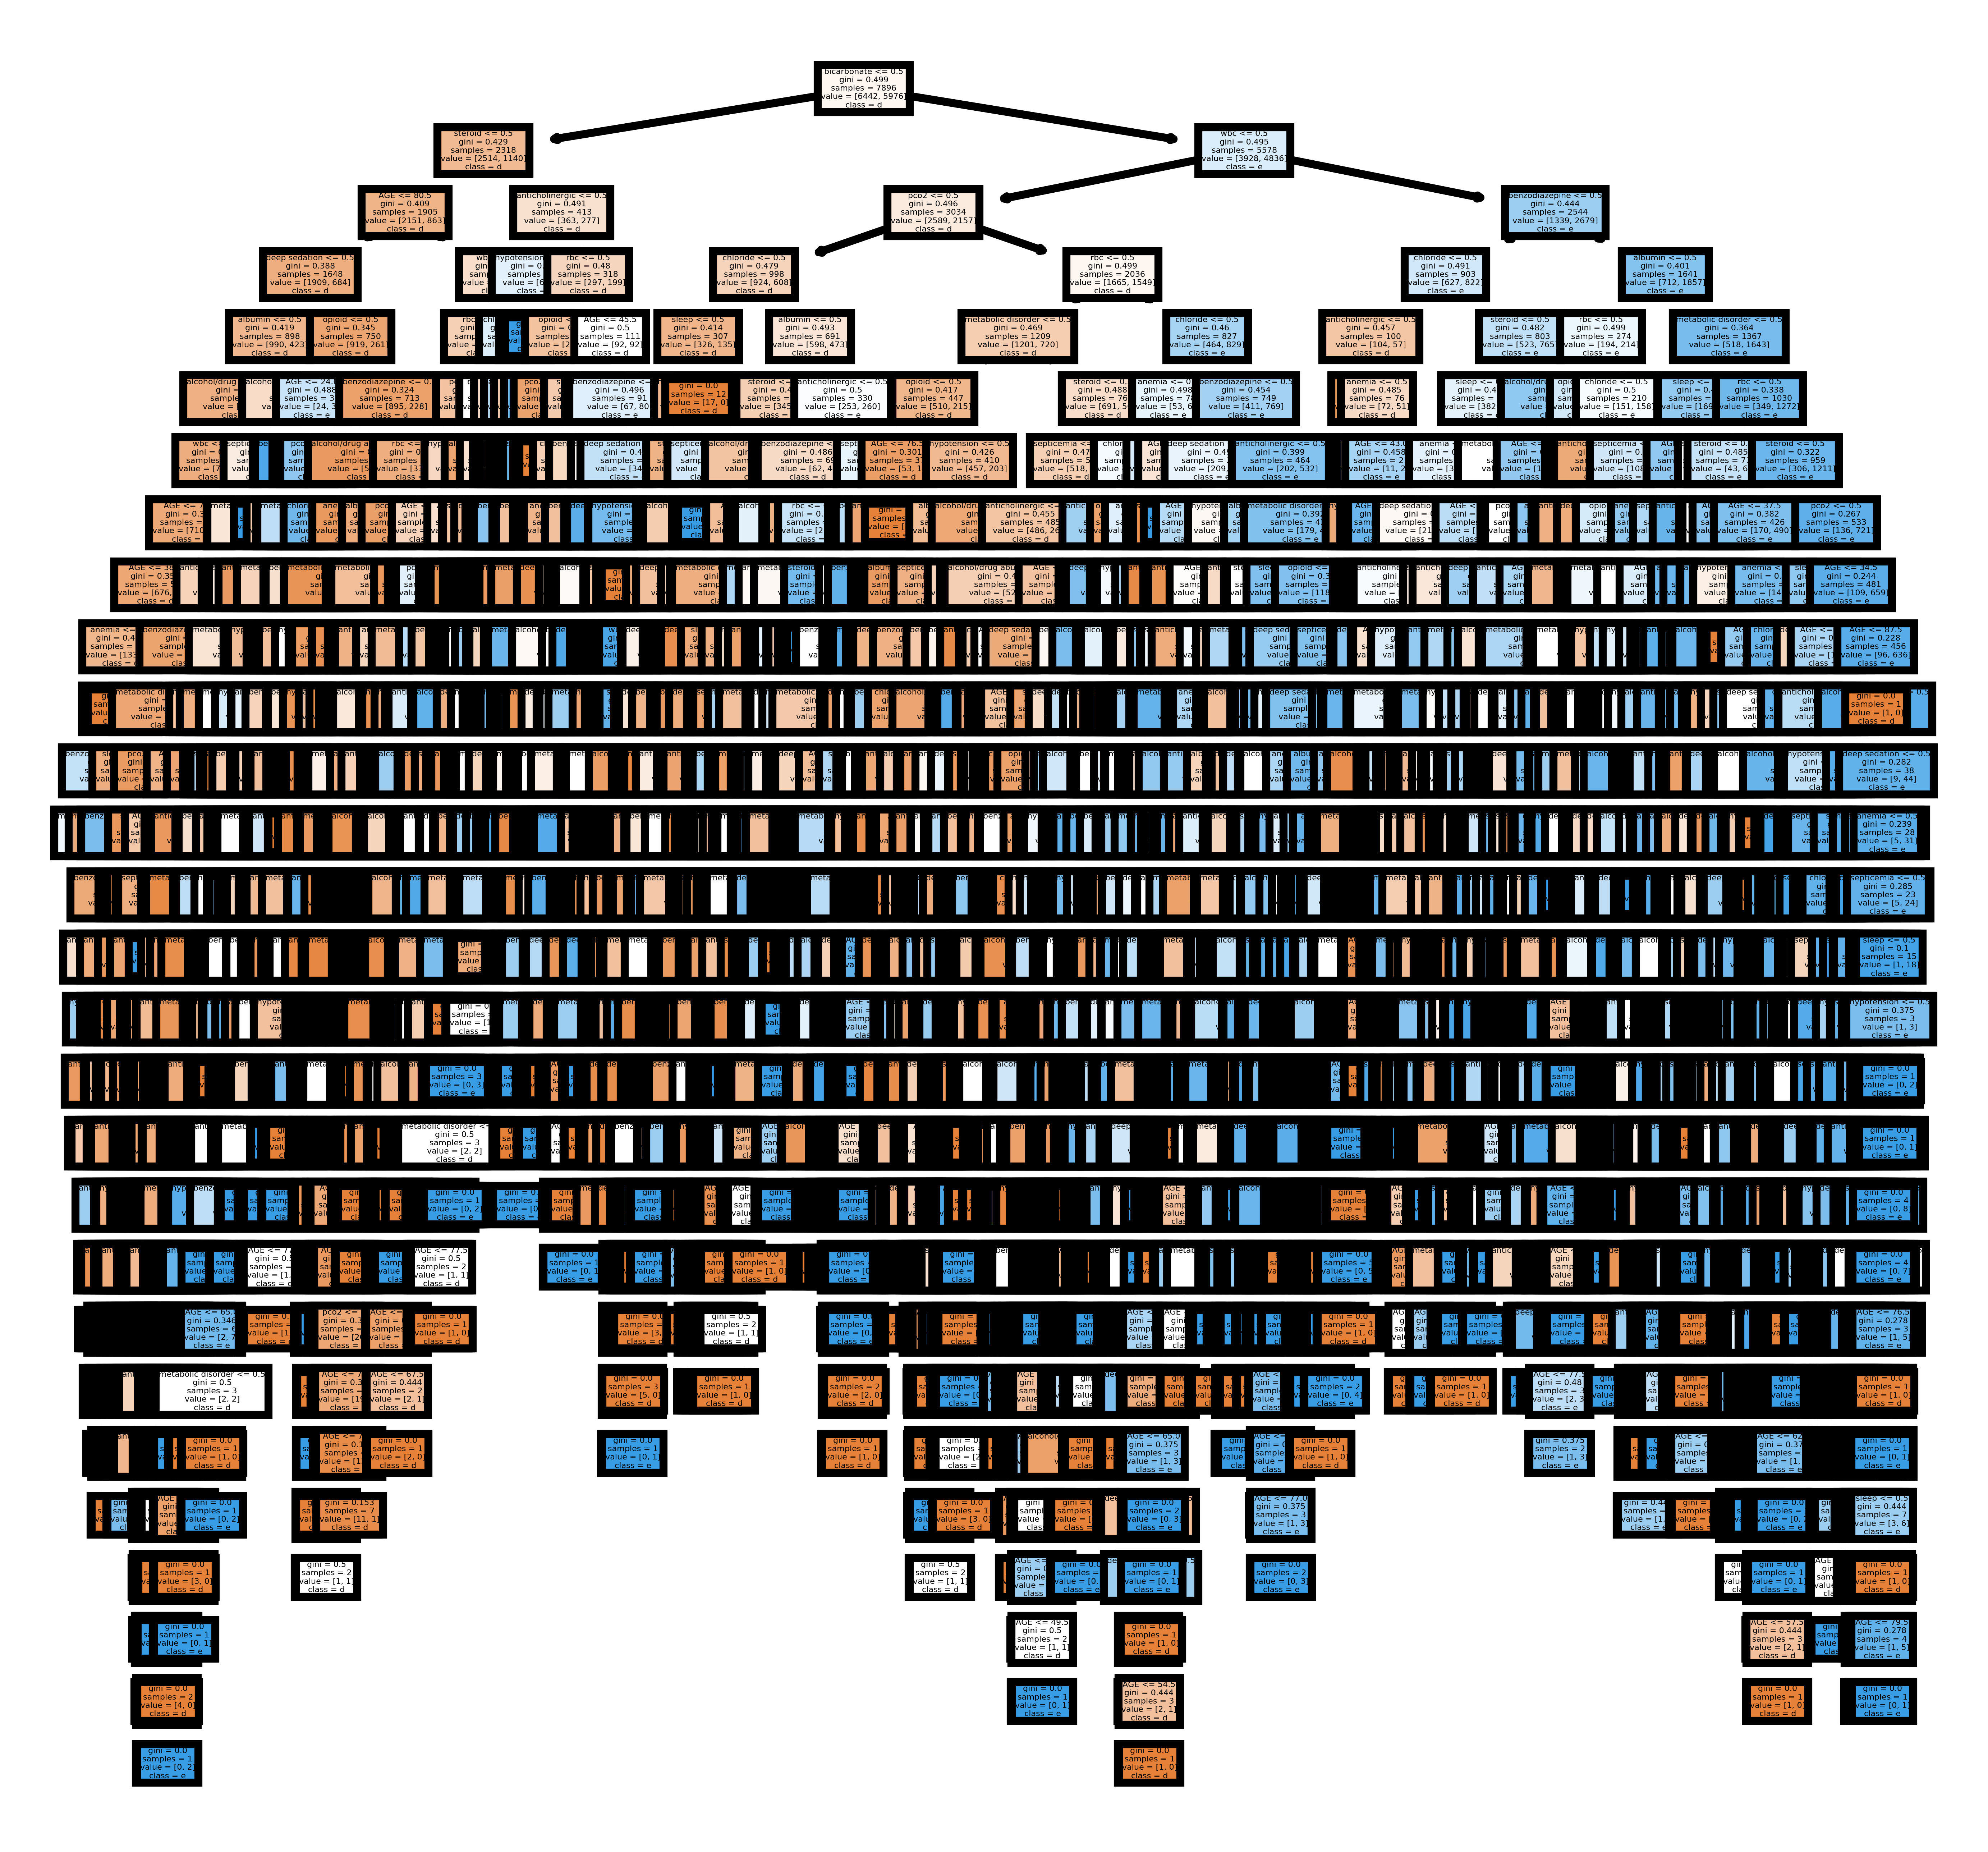

In [9]:
from sklearn import tree
import matplotlib.pyplot as plt
fn=variables.columns
cn="delirium"
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1600)
tree.plot_tree(rfc_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

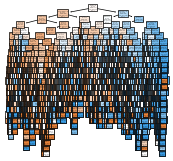

In [26]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc_model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [27]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [68]:
##Creating a sample "perfect" dataset to test the accuracy of our models
from itertools import product

sample_train = pd.DataFrame(columns = ['benzodiazepine', 'opioid', 'anticholinergic', 'steroid', 'deep sedation', 'metabolic disorder', 'hypotension', 'septicemia', 'sleep', 'anemia', 'alcohol/drug abuse', 'delirium'])

num_var = len(sample_train.columns) - 1
pos_p = list(product(range(2), repeat = num_var))

for i in range(2**num_var):
    if i <= 2**(num_var - 1): 
        delirium = 0
    else: 
        delirium = 1
        
    b = pos_p[i][0]
    o = pos_p[i][1]
    a = pos_p[i][2]
    s = pos_p[i][3]
    ds = pos_p[i][4]
    md = pos_p[i][5]
    h = pos_p[i][6]
    sep = pos_p[i][7]
    sle = pos_p[i][8]
    anemia = pos_p[i][9]
    abuse = pos_p[i][10]
    row = {'benzodiazepine': b,
            'opioid': o, 
            'anticholinergic': a,
            'steroid': s,
            'deep sedation': ds,
           'metabolic disorder': md,
           'hypotension': h,
           'septicemia': sep,
           'sleep': sle,
           'anemia': anemia,
           'alcohol/drug abuse': abuse,
            'delirium': delirium
          }
    
    sample_train = sample_train.append(row, ignore_index = True)
    
sample_train = sample_train.astype(int)
    
sample_variables = sample_train.drop(columns=['delirium'])
sample_output = sample_train['delirium']

print(sample_output)

choose = np.random.rand(len(sample_train)) < 0.5
sample_test = sample_train[choose]

# sample_svm = svm.SVC(kernel='linear').fit(sample_variables, sample_output)
# sample_test_var = sample_test.drop(columns = ['delirium'])
# sample_test['predicted delirium'] = sample_svm.predict(sample_test_var)

sample_rfc_model = RandomForestClassifier(bootstrap = True, max_features = 'auto').fit(sample_variables, sample_output)
sample_test_var = sample_test.drop(columns = ['delirium'])
sample_test['predicted delirium'] = sample_rfc_model.predict(sample_test_var)

cnf_matrix = confusion_matrix(sample_test['delirium'], sample_test['predicted delirium'], labels=[0,1])
print('-----CONFUSION MATRIX-----')
print(print_matrix(cnf_matrix))
print('')

accuracy = ((int(cnf_matrix[1,1]) + int(cnf_matrix[0,0]))/sum(sum(cnf_matrix)))*100
print('percent accuracy: ' + str(accuracy))

sample_test

0       0
1       0
2       0
3       0
4       0
       ..
2043    1
2044    1
2045    1
2046    1
2047    1
Name: delirium, Length: 2048, dtype: int64
-----CONFUSION MATRIX-----
         predicted 0 predicted 1
actual 0         514           0
actual 1           0         489

percent accuracy: 100.0


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,benzodiazepine,opioid,anticholinergic,steroid,deep sedation,metabolic disorder,hypotension,septicemia,sleep,anemia,alcohol/drug abuse,delirium,predicted delirium
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,1,0,1,0,0
6,0,0,0,0,0,0,0,0,1,1,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,1,0,0
11,0,0,0,0,0,0,0,1,0,1,1,0,0
13,0,0,0,0,0,0,0,1,1,0,1,0,0
14,0,0,0,0,0,0,0,1,1,1,0,0,0
17,0,0,0,0,0,0,1,0,0,0,1,0,0


In [ ]:
###divide master randomly into train and test
master1 = master.copy()
testChoose = np.random.rand(len(master)) < 0.125
test = master[testChoose]
master1 = master[~testChoose]
choose = np.random.rand(len(master1)) < 0.9
train = master1[choose]
variables = train.drop(columns=['SUBJECT_ID', 'delirium'])
output = train['delirium']

#Random Forest Classifier

https://scikit-learn.org/stable/modules/generated/
    sklearn.ensemble.RandomForestClassifier.html
    
from sklearn.ensemble import RandomForestClassifier

rfc_test = test.copy()

rfc_model = RandomForestClassifier(bootstrap = True, max_features = 'auto')
                                   .fit(variables, output)
rfc_test_var = rfc_test.drop(columns = ['SUBJECT_ID', 'delirium'])
rfc_test['predicted delirium'] = rfc_model.predict(rfc_test_var)


In [11]:
list(variables.columns)

['AGE',
 'benzodiazepine',
 'opioid',
 'anticholinergic',
 'steroid',
 'deep sedation',
 'metabolic disorder',
 'hypotension',
 'septicemia',
 'sleep',
 'anemia',
 'alcohol/drug abuse',
 'rbc',
 'wbc',
 'bicarbonate',
 'albumin',
 'chloride',
 'pco2']